importing libraries

In [5]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [27]:
# Let us load the dataset
df = pd.read_csv("C:\\Users\\USER\\Desktop\\projects\\insurance.csv")

In [35]:
# the first 5 rows of the data
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [47]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Here we can see that our dataset contains 7 columns and 1338 rows.
Our objective is to predict the expenses of new customers from their features like age, sex, bmi and etc.

In [52]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we can see that 'age', 'bmi', 'children' and 'expenses' are quantitative data and 'sex', 'smoker' and 'region' are qualitative data.

In [55]:
# some statistical measures of the dataset
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Here, we see that 50% of our existing customers have 1 child.
We can also see that the expense difference between the 75th percentile and the maximum percentile is very high, which can only mean that there are lots of outliers.

In [62]:
# Now we will see some statistical information of the qualitative data from our dataset.
df.describe(include = "O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


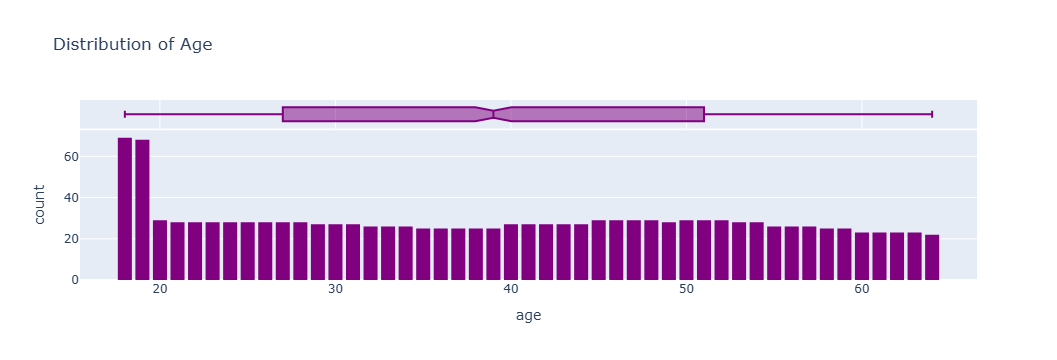

In [123]:
fig = px.histogram(df, x='age', marginal='box', color_discrete_sequence=['purple'], nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.2)
fig.show()

The distribution of the number of people in each age group is almost the same except for age groups '19' and '18'. They seem to have more than twice the number of people from the other age groups.

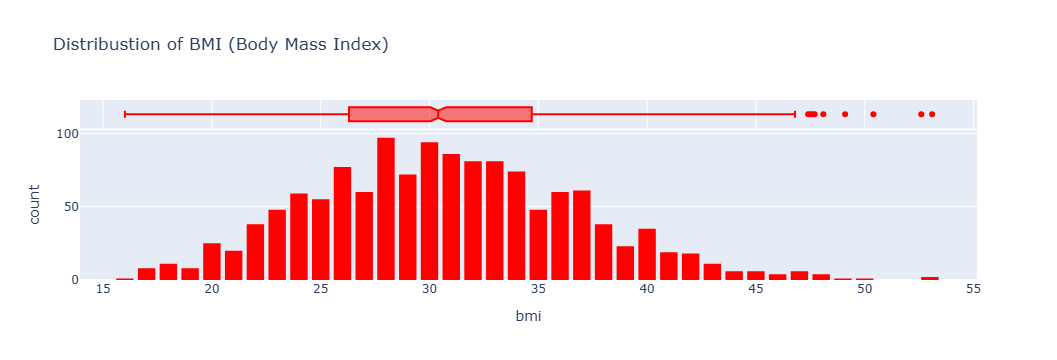

In [129]:
# distribution of BMI(Body Mass Index) of customers 
fig = px.histogram(df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribustion of BMI (Body Mass Index)')

fig.update_layout(bargap=0.2)
fig.show()

This looks like a normal distribution curve with its centre around '30' BMI. It has outliers towards its right side.

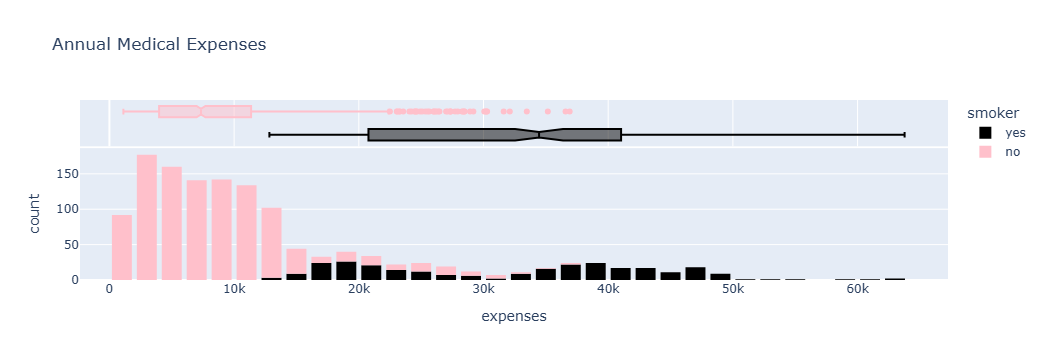

In [105]:
# Distribution of expenses between smokers and non-smokers.
fig = px.histogram(df,
                    x='expenses',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['black', 'pink'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.2)
fig.show() 

Here we can observe that the median expense of non-smokers is much less than the median expense of smokers, and for most customers, their annual expense is around 13k. We also see that the maximum cost of non-smokers is much less than the maximum of the smokers. 

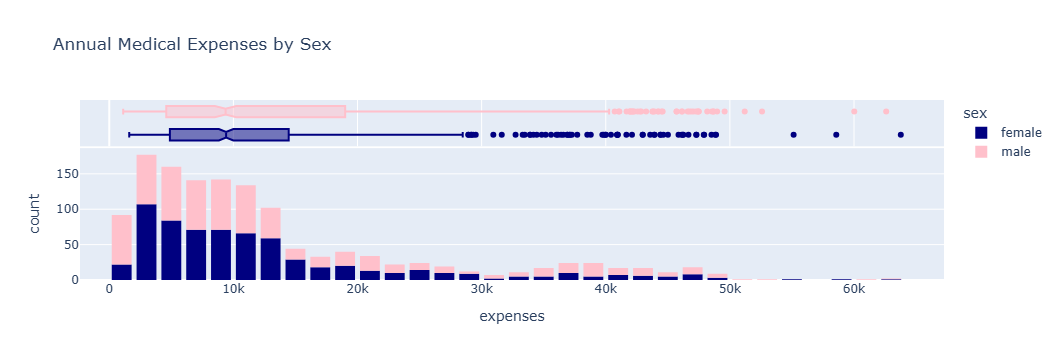

In [135]:
# Distribution of expense with gender
fig = px.histogram(df,
                    x="expenses",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["navy", "pink"],
                    title="Annual Medical Expenses by Sex")

fig.update_layout(bargap=0.2)
fig.show()  

While the median for both genders is the same, the maximum expense for'male' is much less than the maximum of 'female'.

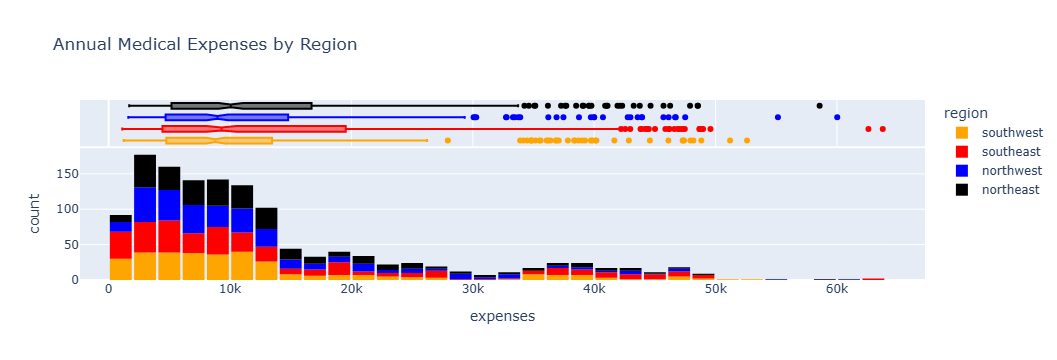

In [138]:
fig = px.histogram(df,
                    x="expenses",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["orange", "red", "blue","black"],
                    title="Annual Medical Expenses by Region")

fig.update_layout(bargap=0.1)
fig.show()  

Here we can observe that the southeast spends the most among all the regions.

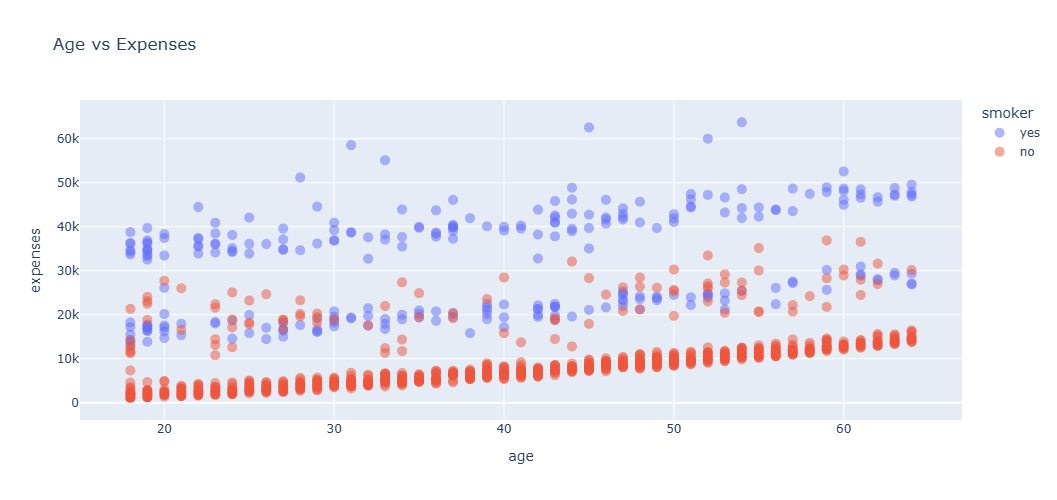

In [198]:
# age vs charge
fig = px.scatter(df,
                x="age",
                y="expenses",
                color="smoker",
                opacity=0.5,
            
                width=900,
                height=500,
                title="Age vs Expenses")

fig.update_traces(marker_size=10)
fig.show()    

Here we see that medical expenses generally increase with age, but there is also another factor, and that is smoking. The smokers pay much more in medical expenses than the non-smokers.

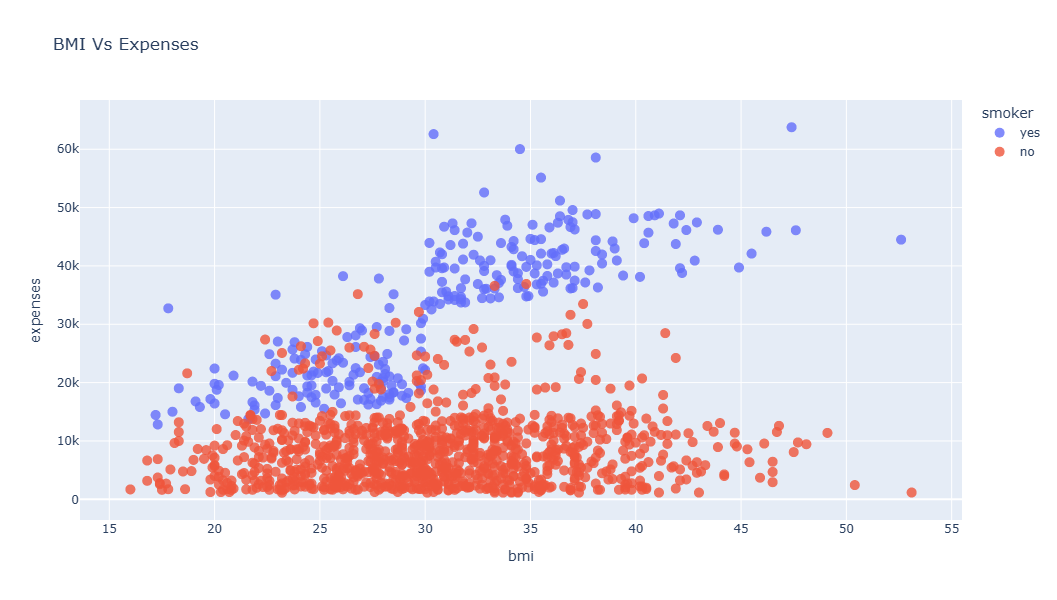

In [202]:
# bmi vs expense
fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                opacity=0.8,
                width=900,
                height=600,
                title="BMI Vs Expenses")

fig.update_traces(marker_size=10)
fig.show()    

From the above plot, we can say that an increase in bmi for non-smoking people is not related to the medical expenses but an increase in bmi for smokers is significantly related to their medical expenses.

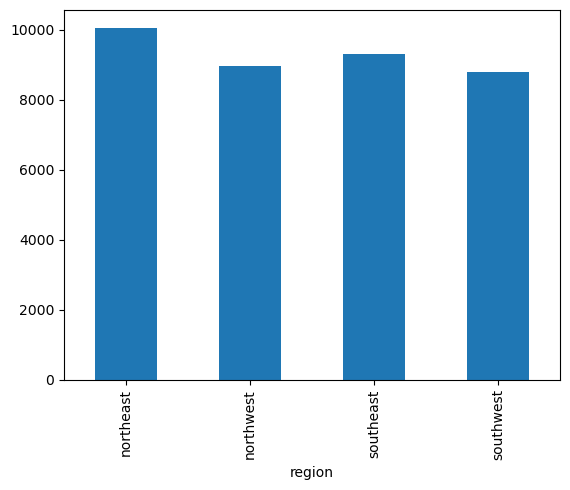

In [205]:
# expense vs region
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

Here, we see that the medical expense of northeast is the most among all the other regions.

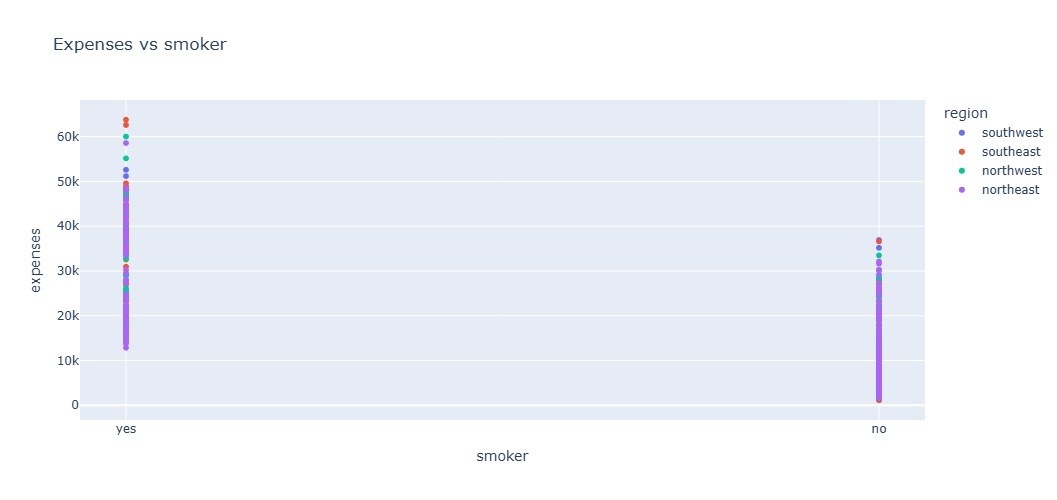

In [240]:
# medical expense vs smoker
fig = px.scatter(df, x="smoker", y="expenses", color="region", width=700, height=500, title="Expenses vs smoker")
fig.show()

We can see that smokers are more prone to health issues than non-smokers, hence smokers pay much more in medical expenses than non-smokers.

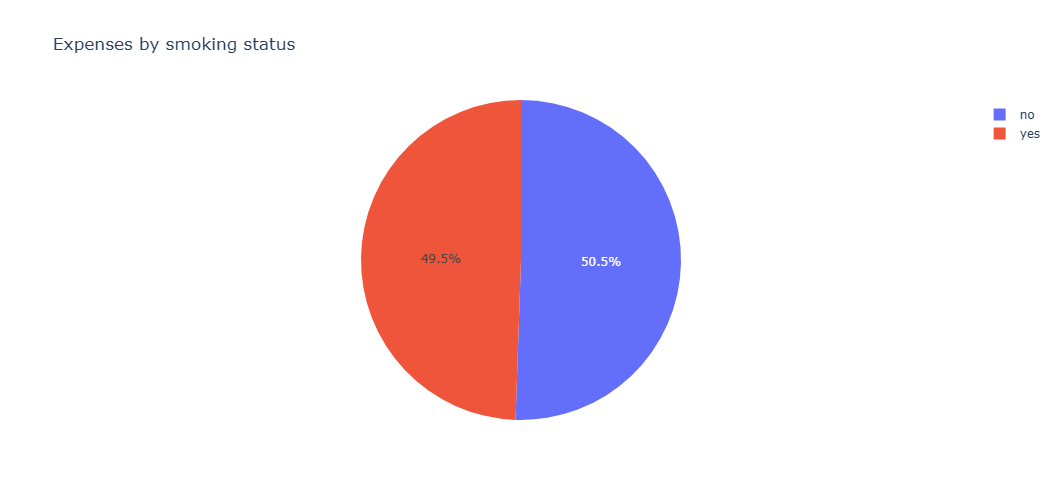

In [242]:
#Expense by smoking status
fig = px.pie(data_frame=df, names='smoker', values='expenses', width=800, height=500, title='Expenses by smoking status')
fig.show()


In conclusion, from all the above statistical representation, we can confidently say that customers who smoke pay much more in medical expenses than customers who do not smoke. We can also say that medical expenses increase as age increases, and people from the Northeast are overall more unwell than people from the other regions.